In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Read the data
data=pd.read_csv(r'fma-rock-vs-hiphop.csv')
# data1=data.dropna(axis=1)
# data['date_created'] =  pd.to_datetime(data['date_created']).dt.year
# data['date_created'] =  pd.to_datetime(data['date_created'])


Label_encoder = LabelEncoder()
data['genre_top'] = Label_encoder.fit_transform(data['genre_top'])

# data['genre_top'] = data['genre_top'].astype('category')
colss=['track_id',	'bit_rate',	'comments' ,'duration','favorites',	'interest',  'listens',	'number']
# Separate target from predictors
X = data.copy()
y = X.pop('genre_top')
X = X.loc[:, colss]

In [3]:
X.head()

,track_id,bit_rate,comments,duration,favorites,interest,listens,number
0,135,256000,1,837,0,2484,1832,0
1,136,256000,1,509,0,1948,1498,0
2,151,192000,0,192,0,701,148,4
3,152,192000,0,193,0,637,98,11
4,153,256000,0,405,5,354,424,2


In [4]:
for col1 in X.columns:
  for col2 in X.columns:
    corr = X[col1].corr(X[col2])
    if (corr >= 0.7) and (col1 != col2):
      print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

Correlation between  interest  and  listens is:  0.95
Correlation between  listens  and  interest is:  0.95


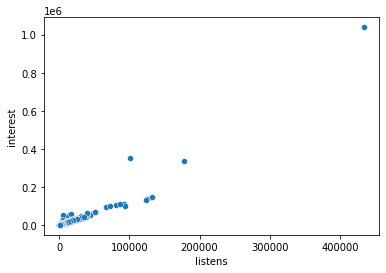

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='listens',y='interest',data=X)
plt.show()

In [6]:
X.drop(columns=['listens'],inplace=True)

print(X.head())

   track_id  bit_rate  comments  duration  favorites  interest  number
0       135    256000         1       837          0      2484       0
1       136    256000         1       509          0      1948       0
2       151    192000         0       192          0       701       4
3       152    192000         0       193          0       637      11
4       153    256000         0       405          5       354       2


In [7]:
#standarize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [8]:
X_scaled.head()

,track_id,bit_rate,comments,duration,favorites,interest,number
0,-1.512717,-0.048288,3.626118,3.462807,-0.254207,0.085765,-0.874071
1,-1.512696,-0.048288,3.626118,1.619146,-0.254207,0.028713,-0.874071
2,-1.512368,-1.088336,-0.076627,-0.162686,-0.254207,-0.104017,-0.308705
3,-1.512346,-1.088336,-0.076627,-0.157065,-0.254207,-0.110829,0.680685
4,-1.512324,-0.048288,-0.076627,1.034570,0.500009,-0.140952,-0.591388


In [9]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,1.959699,-1.374390,3.188364,1.773595,-0.565554,-2.450702,1.702918
1,1.901715,-1.279865,1.679081,0.776274,-0.886211,-2.569679,1.680857
2,-0.218419,-1.843397,-0.306873,0.102074,-0.323735,-0.043636,0.133008
3,-0.260993,-1.570253,-0.827692,0.882292,-0.175683,-0.049812,0.108494
4,0.241517,-1.258753,1.006163,0.543742,-0.911855,0.065214,-0.445802
...,...,...,...,...,...,...,...
17729,0.044136,1.830646,0.811584,-0.600057,0.571076,0.053650,-0.218404
17730,-0.053680,1.759801,0.812471,-0.922849,0.500310,0.024380,-0.104810
17731,0.059090,1.732084,0.741565,-1.127783,0.446104,0.042725,-0.205266
17732,0.375859,1.807650,0.734514,-0.804266,0.510690,0.122939,-0.527263


In [10]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
track_id,-0.007770,0.669264,0.098158,-0.297743,0.672819,-0.023146,-0.022758
bit_rate,-0.016882,0.687060,0.180289,0.013166,-0.701788,0.043612,0.024010
comments,0.544475,0.025927,0.011680,0.038035,-0.016562,-0.739801,0.392062
duration,0.014140,-0.051580,0.820182,0.541021,0.172637,0.043863,-0.003085
favorites,0.623334,0.013673,-0.011288,0.002916,-0.028242,0.046555,-0.779850
interest,0.559388,0.010264,-0.050012,-0.002556,0.041846,0.667954,0.486373
number,-0.039259,0.276422,-0.531411,0.785500,0.148933,-0.001892,-0.021410


In [11]:
import numpy as np
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression

def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs


def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb13c1e12d0>,
      dtype=object)

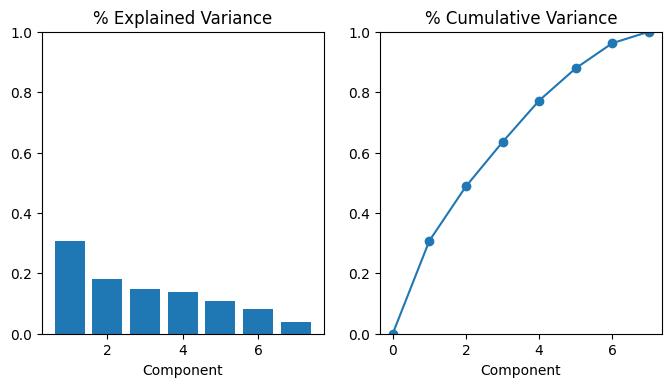

In [12]:
plot_variance(pca)

In [13]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC2    0.025933
PC3    0.022271
PC6    0.021622
PC7    0.017596
PC1    0.012033
PC5    0.006399
PC4    0.000594
Name: MI Scores, dtype: float64

In [14]:
X_pca1=X_pca.drop(columns=['PC5','PC4'])

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X_pca1, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

DT=DecisionTreeClassifier(random_state=1)

DT.fit(X_train,y_train)

predictions=DT.predict(X_valid)
print("Decision Tree: ")
print("accuracry score: ",accuracy_score(predictions,y_valid))
print("precision score: ",precision_score(predictions,y_valid))
print("MAE score: ",mean_absolute_error(predictions,y_valid))
print("Confusion Matrix: ")
print(confusion_matrix(predictions,y_valid))

Decision Tree: 
accuracry score:  0.7637440090217085
precision score:  0.8556701030927835
MAE score:  0.2362559909782915
Confusion Matrix: 
[[ 302  406]
 [ 432 2407]]


In [17]:
DT1=DecisionTreeClassifier(random_state=1,class_weight='balanced')

DT1.fit(X_train,y_train)

predictions_b=DT1.predict(X_valid)

print("Balanced Decision Tree: ")
print("accuracry score: ",accuracy_score(predictions_b,y_valid))
print("precision score: ",precision_score(predictions_b,y_valid))
print("MAE score: ",mean_absolute_error(predictions_b,y_valid))
print("Confusion Matrix: ")
print(confusion_matrix(predictions_b,y_valid))

Balanced Decision Tree: 
accuracry score:  0.7685367916549196
precision score:  0.8574475648773552
MAE score:  0.23146320834508036
Confusion Matrix: 
[[ 314  401]
 [ 420 2412]]


In [18]:
from sklearn.linear_model import LogisticRegression

LG = LogisticRegression(random_state=1)

LG.fit(X_train,y_train)

predictions1=LG.predict(X_valid)

print("Logistic Regression: ")
print("accuracry score: ",accuracy_score(predictions1,y_valid))
print("precision score: ",precision_score(predictions,y_valid))
print("MAE score: ",mean_absolute_error(predictions1,y_valid))
print("Confusion Matrix: ")
print(confusion_matrix(predictions1,y_valid))

Logistic Regression: 
accuracry score:  0.7933464899915421
precision score:  0.8556701030927835
MAE score:  0.20665351000845786
Confusion Matrix: 
[[  18   17]
 [ 716 2796]]


In [19]:
from sklearn.linear_model import LogisticRegression

LG1 = LogisticRegression(random_state=1,class_weight='balanced')

LG1.fit(X_train,y_train)

predictions1_b=LG1.predict(X_valid)

print("Balanced logistic Regression: ")
print("accuracry score: ",accuracy_score(predictions1_b,y_valid))
print("precision score: ",precision_score(predictions_b,y_valid))
print("MAE score: ",mean_absolute_error(predictions1_b,y_valid))
print("Confusion Matrix: ")
print(confusion_matrix(predictions1_b,y_valid))

Balanced logistic Regression: 
accuracry score:  0.6521003665069073
precision score:  0.8574475648773552
MAE score:  0.3478996334930928
Confusion Matrix: 
[[ 484  984]
 [ 250 1829]]


In [24]:
from sklearn.model_selection import cross_val_score

DT2=DecisionTreeClassifier(random_state=1,class_weight='balanced')
LG2 = LogisticRegression(random_state=1,class_weight='balanced')

cv1=cross_val_score(DT2,X_pca1,y,scoring='precision')
cv2=cross_val_score(LG2,X_pca1,y,scoring='precision')

print("Decision Tree cross val:")
print(cv1.mean())
print("Logistic regression cross val:")
print(cv2.mean())

Decision Tree cross val:
0.8205656089840074
Logistic regression cross val:
0.876980138068831
